In [4]:
import os
import numpy as np
import matplotlib.pyplot as plt

In [5]:
df = np.loadtxt("/content/drive/MyDrive/Yashar`s Code/COV.txt")
union_data = np.loadtxt("/content/drive/MyDrive/Yashar`s Code/union_data.txt")

Text(0.5, 1.0, 'COV non-diagonal elements hist')

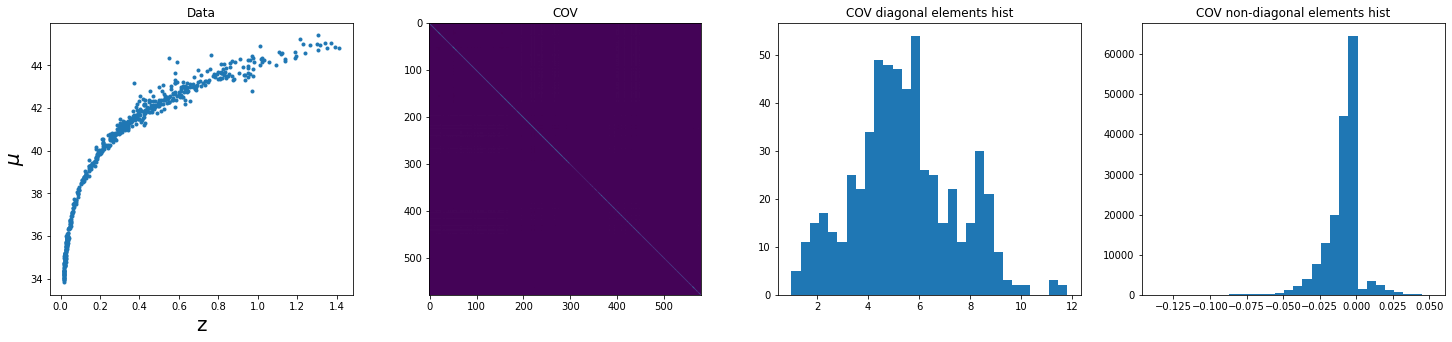

In [6]:
z = union_data[:, 0]
mu = union_data[:, 1]
d_elements = []
not_d_elements = []
for i in range(len(mu)):
  for j in range(i+1):
        if i==j:
          d_elements.append(df[i][j])
        if i!=j:
          not_d_elements.append(df[i][j])


fig,ax=plt.subplots(1,4,figsize=(25,5))
ax[0].plot(z,mu,'.') ; ax[0].set_xlabel(r'z', fontsize=20) ; ax[0].set_ylabel(r'$\mu$', fontsize=20) ; ax[0].set_title('Data')
ax[1].imshow(df) ; ax[1].set_title('COV')
ax[2].hist(d_elements, bins=30) ; ax[2].set_title('COV diagonal elements hist')
ax[3].hist(not_d_elements, bins=30) ; ax[3].set_title('COV non-diagonal elements hist')

In [7]:
def Omega_K(omega_m, omega_lambda):
    return 1-omega_m-omega_lambda

def Integral(z_i, omega_m, omega_lambda, omega):
    omega_K = Omega_K(omega_m, omega_lambda)
    def arr(z_i):
        return 1/(omega_m*(1+z_i)**3 + omega_lambda*(1+z_i)**(3*(omega+1)) - omega_K*(1+z_i)**2)**.5
    z_range=np.linspace(0,z_i,2)
    dz=z_range[1]-z_range[0]
    return np.trapz([arr(zi) for zi in z_range])*dz 

def DL(z_i, omega_m, omega_lambda, omega):
    omega_K = Omega_K(omega_m, omega_lambda)
    integral = Integral(z_i, omega_m, omega_lambda, omega)
    a = (1+z_i)/np.sqrt(abs(omega_K))
    b = np.sqrt(abs(omega_K)) * integral
    if omega_K == 0:
        return (1+z_i)*integral
    elif omega_K > 0:
        sinn = np.sinh(b)
    else:
        sinn = np.sin(b)
    return a*sinn

def mu_th(z, h0, omega_m, omega_lambda, omega):
    mu_list=[]
    for z_i in z:
        dL=DL(z_i, omega_m, omega_lambda, omega)
        mu_list.append(5*(np.log10(dL)+np.log10(3*10**5/h0)+5))
    return mu_list

In [8]:
def Chi_omega_m(omega_m, sigma_m=.1):
    return (omega_m-.3)**2/(2*sigma_m**2)
def Chi_omega_lambda(omega_lambda, sigma_lambda=.1):
    return (omega_lambda-.7)**2/(2*sigma_lambda**2)
def Chi_omega(omega, sigma_omega=1):
    return (omega+1)**2/(2*sigma_omega**2)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: RuntimeWarning: divide by zero encountered in double_scalars
  from ipykernel import kernelapp as app


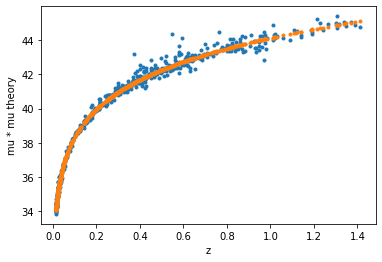

In [17]:
omega_m_real=0.3 ; omega_lambda_real=.7 ; omega_real=-1 ; h0_real=70
mu_theory = mu_th(z, h0_real, omega_m_real, omega_lambda_real, omega_real)
plt.plot(z, mu, ".")
plt.xlabel("z")
plt.ylabel("mu * mu theory")
plt.plot(z, mu_theory, '.')


In [12]:
omega_m_old=np.random.random()
omega_lambda_old=np.random.random()
omega_old=-np.random.random()
h0_old=np.random.random() + 70

mu_theory = mu_th(z, h0_old, omega_m_old, omega_lambda_old, omega_old)

delta = []
for i in range(len(z)):
    delta.append(mu[i]-mu_theory[i])
delta=np.array(delta)
Chi2_old = delta.T @ df @ delta + Chi_omega_m(omega_m_old) + Chi_omega_lambda(omega_lambda_old) + Chi_omega(omega_old)


In [13]:
# MCMC
for i in range(1000):
    omega_m_new      = abs(omega_m_old      + np.random.normal(scale=.1))
    omega_lambda_new = abs(omega_lambda_old + np.random.normal(scale=.1))
    omega_new        = -abs(omega_old       + np.random.normal(scale=.1))
    h0_new           = abs(h0_old           + np.random.normal(scale=.1))

    mu_theory = mu_th(z, h0_new, omega_m_new, omega_lambda_new, omega_new)

    delta = []
    for i in range(len(z)):
        delta.append(mu[i]-mu_theory[i])
    delta=np.array(delta)
    Chi2_new = delta.T @ df @ delta + Chi_omega_m(omega_m_new) + Chi_omega_lambda(omega_lambda_new) + Chi_omega(omega_new)

    dChi2 = Chi2_new - Chi2_old
    AR = min([1, np.exp(-dChi2/2)])
    rand = np.random.random()
    if rand < AR:
        omega_m_old      = omega_m_new
        omega_lambda_old = omega_lambda_new
        omega_old        = omega_new
        h0_old           = h0_new
        Chi2_old         = Chi2_new

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in double_scalars
  import sys


omega_m = 0.41848922569215163
omega_lambda = 0.6329964695918053
omega = -1.8213328690568504
h0 = 73.64881661627108


Text(0, 0.5, 'mu * mu theory')

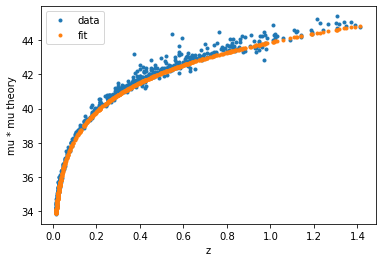

In [18]:
print('omega_m =', omega_m_old)
print('omega_lambda =', omega_lambda_old)
print('omega =', omega_old)
print('h0 =', h0_old)

mu_theory = mu_th(z, h0_old, omega_m_old, omega_lambda_old, omega_old)

plt.plot(z, mu, '.', label='data')
plt.plot(z, mu_theory, '.', label='fit')
plt.legend()
plt.xlabel("z")
plt.ylabel("mu * mu theory")